In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn

# Описание работы
Измерение удовлетворенности клиентов является ключевым фактором для ведения современного бизнеса, поскольку оно может внести значительный вклад в повышение качества обслуживания. Чтобы соответствовать ожиданиям клиентов и достигать более высокого уровня качества, авиакомпаниям необходимо разработать конкретный механизм измерения удовлетворенности использования предоставленных авикомпанией услуг пассажиров. Таким образом, данная работа решает задачу классификацию удовлетворенности клиентов авиакомпаний.

## 1. Загрузка и чтение данных

In [2]:
url = "https://github.com/a-sidorova/machine-learning-course/raw/master/airline_passenger_satisfaction.csv"
data_raw = pd.read_csv(url)
data_raw.shape

(129880, 24)

Таблица содержит информацию о порядка 129 тысяч пассажиров авиаперелетов. 

In [3]:
data_raw.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Каждый пассажир охарактеризован 23 признаками (будем считать, что первый столбец - идентификатор клиента - не признак, поскольку по идентификатору мы ничего сказать про клиента не может). Среди них есть категориальные (пол, тип клиента, тип полета, класс клиента, удовлетворенность), числовые (возраст, дистанция перелета, задержка вылета и прилета) и оценки (на сколько удовлетворен клиент какой-либо услугой).

Рассмотрим отдельно каждый признак:


In [4]:
data_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

0. Unnamed: 0 - ID пассажира - числовой (в последствии переименуем)
1. Gender - пол пассажира - категориальный (male, female)
2. cutomer_type - тип клиента - категориальный (постоянный или нет)
3. type_of_travel - тип поездки - категориальный (личная, бизнес)
4. customer_class - класс клиента - категориальный (эконом, эконом+, бизнес)
5. flight_distance - дистанция перелета в милях - числовой
6. inflight_wifi_service - качество Wi-Fi во время полета - категориальный (1-5)
7. departure_arrival_time_convenient - удобное время вылета и прибытия - категориальный (1-5)
8. ease_of_online_booking - простота онлайн-бронирования - категориальный (1-5)
9. gate_location - удобство расположения выхода - категориальный (1-5)
10. food_and_drink - качество еды - категориальный (1-5)
11. online_boarding - удобство онлайн регистрации - категориальный (1-5)
12. seat_comfort - комфорт сидения - категориальный (1-5)
13. inflight_entertainment - качество разлвечений во время полета - категориальный (1-5)
14. onboard_service - качество услуг на борту - категориальный (1-5)
15. leg_room_service
16. baggage_handling - качество перевоза багажа - категориальный (1-5)
17. checkin_service - качество работы службы регистрации - категориальный (1-5)
18. inflight_service - качество работы бортовой службы - категориальный (1-5)
19. cleanliness - качество чистоты на борту - категориальный (1-5)
20. departure_delay_in_minutes - задержка вылета рейса в минутах - числовой
21. arrival_delay_in_minutes - задержка прилета рейса в минутах - числовой
22. satisfaction - удовлетворенность клиента - категориальный (удовлетворен, нейтрален/неудовлетворен)

Переименуем первую колонку, отвечающую за ID клиента, в более понятное наименование (Unnamed: 0 - ни о чем нам не говорит):


In [5]:
data_raw.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
data_raw.columns

Index(['ID', 'Gender', 'customer_type', 'age', 'type_of_travel',
       'customer_class', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

Заменим тип Object категориальных признаков на специальный тип, который предназначен для хранения как раз таких категориальных значений:

In [6]:
data_raw['Gender'] = data_raw['Gender'].astype('category')
data_raw['customer_type'] = data_raw['customer_type'].astype('category')
data_raw['type_of_travel'] = data_raw['type_of_travel'].astype('category')
data_raw['customer_class'] = data_raw['customer_class'].astype('category')
data_raw['satisfaction'] = data_raw['satisfaction'].astype('category')


In [7]:
data_raw['Gender'].dtype

CategoricalDtype(categories=['Female', 'Male'], ordered=False)

In [8]:
data_raw['customer_type'].dtype

CategoricalDtype(categories=['Loyal Customer', 'disloyal Customer'], ordered=False)

In [9]:
data_raw['type_of_travel'].dtype

CategoricalDtype(categories=['Business travel', 'Personal Travel'], ordered=False)

In [10]:
data_raw['customer_class'].dtype

CategoricalDtype(categories=['Business', 'Eco', 'Eco Plus'], ordered=False)

In [11]:
data_raw['satisfaction'].dtype

CategoricalDtype(categories=['neutral or dissatisfied', 'satisfied'], ordered=False)

## 2. Визуализация и основные характеристики

Получим информацию о количественных признаках:

In [14]:
data_raw.describe()

,ID,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64939.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32469.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64939.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97409.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129879.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Таким образом, мы получили:
1. *Count* - Количество значений для каждого признака. У каждого признака это число равно 129880, за исключением признака "Задержка прилета в минутах" - 129487. То есть на самом деле, данный признак имеет пропущенные значения, а именно 393 значения. По сути, это 0.3% от всех данных, что мало. В дальнейшем мы решим, что с этим делать.
2. *Mean* - Средние значения.
3. *STD* - Стандартные отклонения. Данная константа показывает, на сколько в среднем отклоняются варианты от среднего значения.
4. *Min/Max* - Минимальные/Максимальные значения.
5. *25%, 75%* - Пертвый и третий квартили. То есть это значения, которые объект не превышает с вероятностью 25% и 75% соответственно.
6. *50%* - Квартиль 50% или медиана.

Рассмотрим несколько самых интересных признаков отдельно.

**age (Возраст).**
Средний возраст клиентов - 39 лет, причем медиана почти равна данному значению - 40. Учитывая, что среднее отклонение 15 лет, можно сделать вывод, что основными клиентами являются люди возраста 25-55 лет.

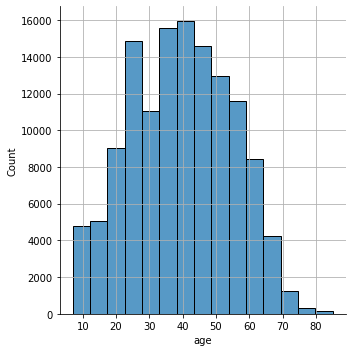

In [33]:
sns.displot(data_raw['age'], bins=15)
plt.grid()
pass

На гистограмме кстати заметна некоторая просадка по клиентам в 30 лет. Их явно меньше, чем клиентов 25 лет или 35 лет.

**flight_distance (Дистанция полета).**
Среднее значение - 1190 миль, при этом среднее отклонение равно 997 милям, почти столько же, сколько само среднее значение, а медиана равна 844 милям. Это говорит о том, что 50% клиентов пролетело до 844 миль, а остальные почти равномерно распределились по оставшимся милям после 1190. Собственно на гистограмме ниже видно, что большой процент выборки скопился как раз у значений 0-1000 миль.

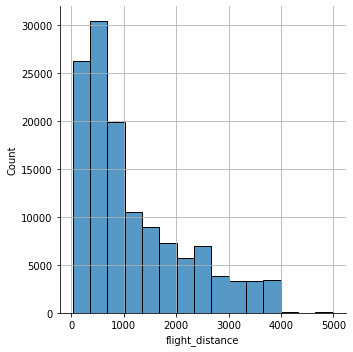

In [35]:
sns.displot(data_raw['flight_distance'], bins=15)
plt.grid()
pass

Также заметим, что следующие признаки: **"inflight_wifi_service", "departure_arrival_time_convenient", "ease_of_online_booking", "gate_location", "food_and_drink", "online_boarding", "cleanliness"** - имееют следующие значения квантилей:
- 25% - 2
- 50% - 3
- 75% - 4
То есть в во всех этих признаках клиенты в 25% случаях поставили оценку не выше 2, в 50% не выше 3, а в 75% не выше 4. То есть авиакомпаниям есть над чем поработать в данных услугах.

В признаках же **"seat_comfort", "baggage_handling", "inflight_service"** 50% квантиль равен 4 и 75% - 5, что говорит о том, что в основном люди поставили хорошие оценки и были довольны удобством и комфортом предоставленных посадочных мест, доставкой багажа и сервисом во время полета.

Насчет **"inflight_entertainment", "onboard_service", "leg_room_service"** - квантили 50% и 75% равны 4, то есть люди в принципе также были довольны предоставленными данными услугами.

Сервис **"checkin_service"** - имеет значения квантилей 3, 3, 4, что говорит о том, что клиентам не особо нравится сервис регистрации на рейс, раз 50% клиентов не поставили оценку выше 3.

In [13]:
data_raw.describe(include=['category'])

,Gender,customer_type,type_of_travel,customer_class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


Для категориальных признаков мы получили такие характеристики, как:
1. Count - Количество значений. Заметим, что все признаки имеют одинаковое количество значений, равное 129880, то есть пропущенных значений нет.
2. Unique - Количество уникальных значений.
3. Top - Наиболее встречающееся значение.
4. Freq - Частота наиболее встречающегося значения.

Вычислим матрицу корреляции для количественных признаков (чтобы выявить связи между признаками):

In [15]:
corr_matrix = data_raw.corr()
corr_matrix

,ID,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
ID,1.000000,0.007166,0.002895,-0.002745,-0.002134,0.001116,0.003236,0.000937,0.002947,0.001868,0.000269,0.001279,0.002237,0.000007,-0.000489,0.001669,-0.000944,-0.003972,-0.003299
age,0.007166,1.000000,0.099459,0.016116,0.036960,0.022565,-0.000398,0.023194,0.207572,0.159136,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565,-0.009041,-0.011248
flight_distance,0.002895,0.099459,1.000000,0.006701,-0.018914,0.065165,0.005520,0.057066,0.214825,0.157662,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648,0.002402,-0.001935
inflight_wifi_service,-0.002745,0.016116,0.006701,1.000000,0.344915,0.714807,0.338573,0.132214,0.457445,0.121513,0.207802,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300,-0.015946,-0.017749
departure_arrival_time_convenient,-0.002134,0.036960,-0.018914,0.344915,1.000000,0.437620,0.447510,0.000687,0.072287,0.008666,-0.008380,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862,0.000778,-0.000942
ease_of_online_booking,0.001116,0.022565,0.065165,0.714807,0.437620,1.000000,0.460041,0.030514,0.404866,0.028561,0.046564,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125,-0.005318,-0.007033
gate_location,0.003236,-0.000398,0.005520,0.338573,0.447510,0.460041,1.000000,-0.002872,0.002756,0.002788,0.002741,-0.029019,-0.005181,0.000972,-0.039353,0.000310,-0.005918,0.005973,0.005658
food_and_drink,0.000937,0.023194,0.057066,0.132214,0.000687,0.030514,-0.002872,1.000000,0.233500,0.575846,0.623461,0.057404,0.033173,0.035321,0.085198,0.035210,0.658054,-0.029164,-0.031715
online_boarding,0.002947,0.207572,0.214825,0.457445,0.072287,0.404866,0.002756,0.233500,1.000000,0.419253,0.283922,0.154242,0.123225,0.083541,0.204238,0.074058,0.329377,-0.019404,-0.022730
seat_comfort,0.001868,0.159136,0.157662,0.121513,0.008666,0.028561,0.002788,0.575846,0.419253,1.000000,0.611837,0.130545,0.104272,0.074620,0.189979,0.068842,0.679613,-0.027999,-0.030521


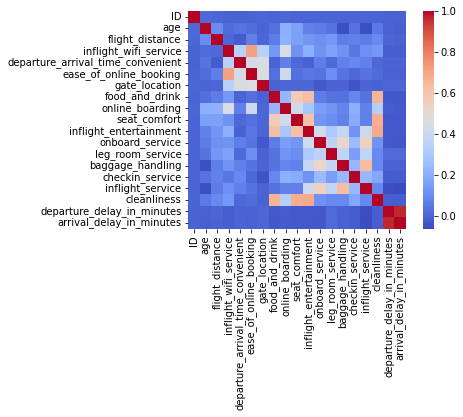

In [16]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm')
pass

Благодаря визуальному образу корреляционной матрицы можно заметить, что признаки "Задержка вылета" и "Задержка прилета" имеют коэффициент корреляции близкий к единицу. Это говорит о сильной положительной связи.

In [19]:
corr_matrix >= 0.7

,ID,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
ID,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
age,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
flight_distance,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
inflight_wifi_service,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
departure_arrival_time_convenient,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
ease_of_online_booking,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
gate_location,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
food_and_drink,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
online_boarding,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
seat_comfort,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


Помимо "Задержка вылета" и "Задержка прилета" признаки "Простота онлайн бронирования" и "Качество Wi-Fi во время полета" имеют коэффициент корреляции больше 0.7. То есть можно говорить о сильной связи между данными признаками

Остальные признаки имеют между собой коэффициенты корреляции меньше 0.7, что может говорить о слабой связи между ними.

Рассмотрим категориальные признаки.
Gender:

In [21]:
data_raw['Gender'].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

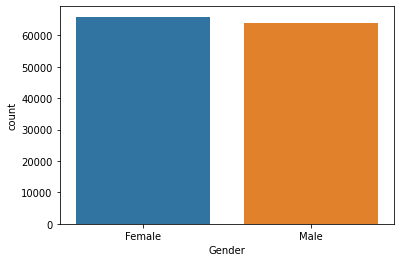

In [22]:
sns.countplot(x='Gender', data=data_raw)
pass

Заметим, что в принципе в наборе данных количество мужчин и женщин сравнительно одинаково (женщин немного больше).

In [23]:
data_raw['customer_type'].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: customer_type, dtype: int64

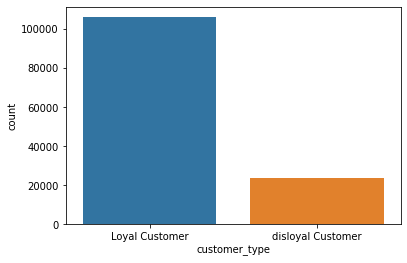

In [24]:
sns.countplot(x='customer_type', data=data_raw)
pass

Можно сделать вывод, что в данной выборке представлено много большее количество постоянных клиентов.

In [25]:
data_raw['type_of_travel'].value_counts()

Business travel    89693
Personal Travel    40187
Name: type_of_travel, dtype: int64

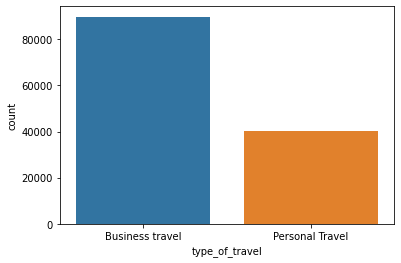

In [26]:
sns.countplot(x='type_of_travel', data=data_raw)
pass

Также клиентов, кто путешествовал по бизнес причинам (рабочим) примерно в 2 раза больше, чем тех, кто летал по личным целям.

In [27]:
data_raw['customer_class'].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: customer_class, dtype: int64

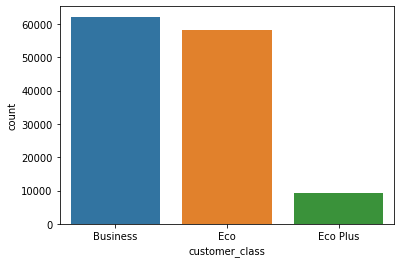

In [28]:
sns.countplot(x='customer_class', data=data_raw)
pass

В основном люди использовал Бизнесс-класс или Эконом (Бизнес даже немного больше). Эконом+ оказался не таким популярным в отличие от других типов перелета.

In [29]:
data_raw['satisfaction'].value_counts()

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

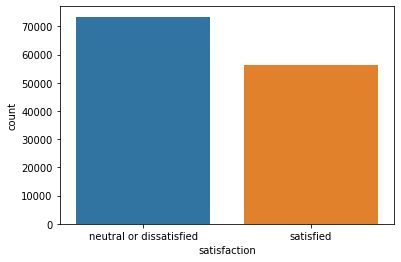

In [30]:
sns.countplot(x='satisfaction', data=data_raw)
pass

Также заметим, что в данной выборке представлена информация о клиентах, которые в итоге были либо нейтральными, либо неудовлетворены перелетом, нежели да. Это говорит о том, что наши классы достаточно сбалансированы

Взглянем на всевозможные диаграммы рассеивания для каждой пары признаков (возьмем случайные 10%)

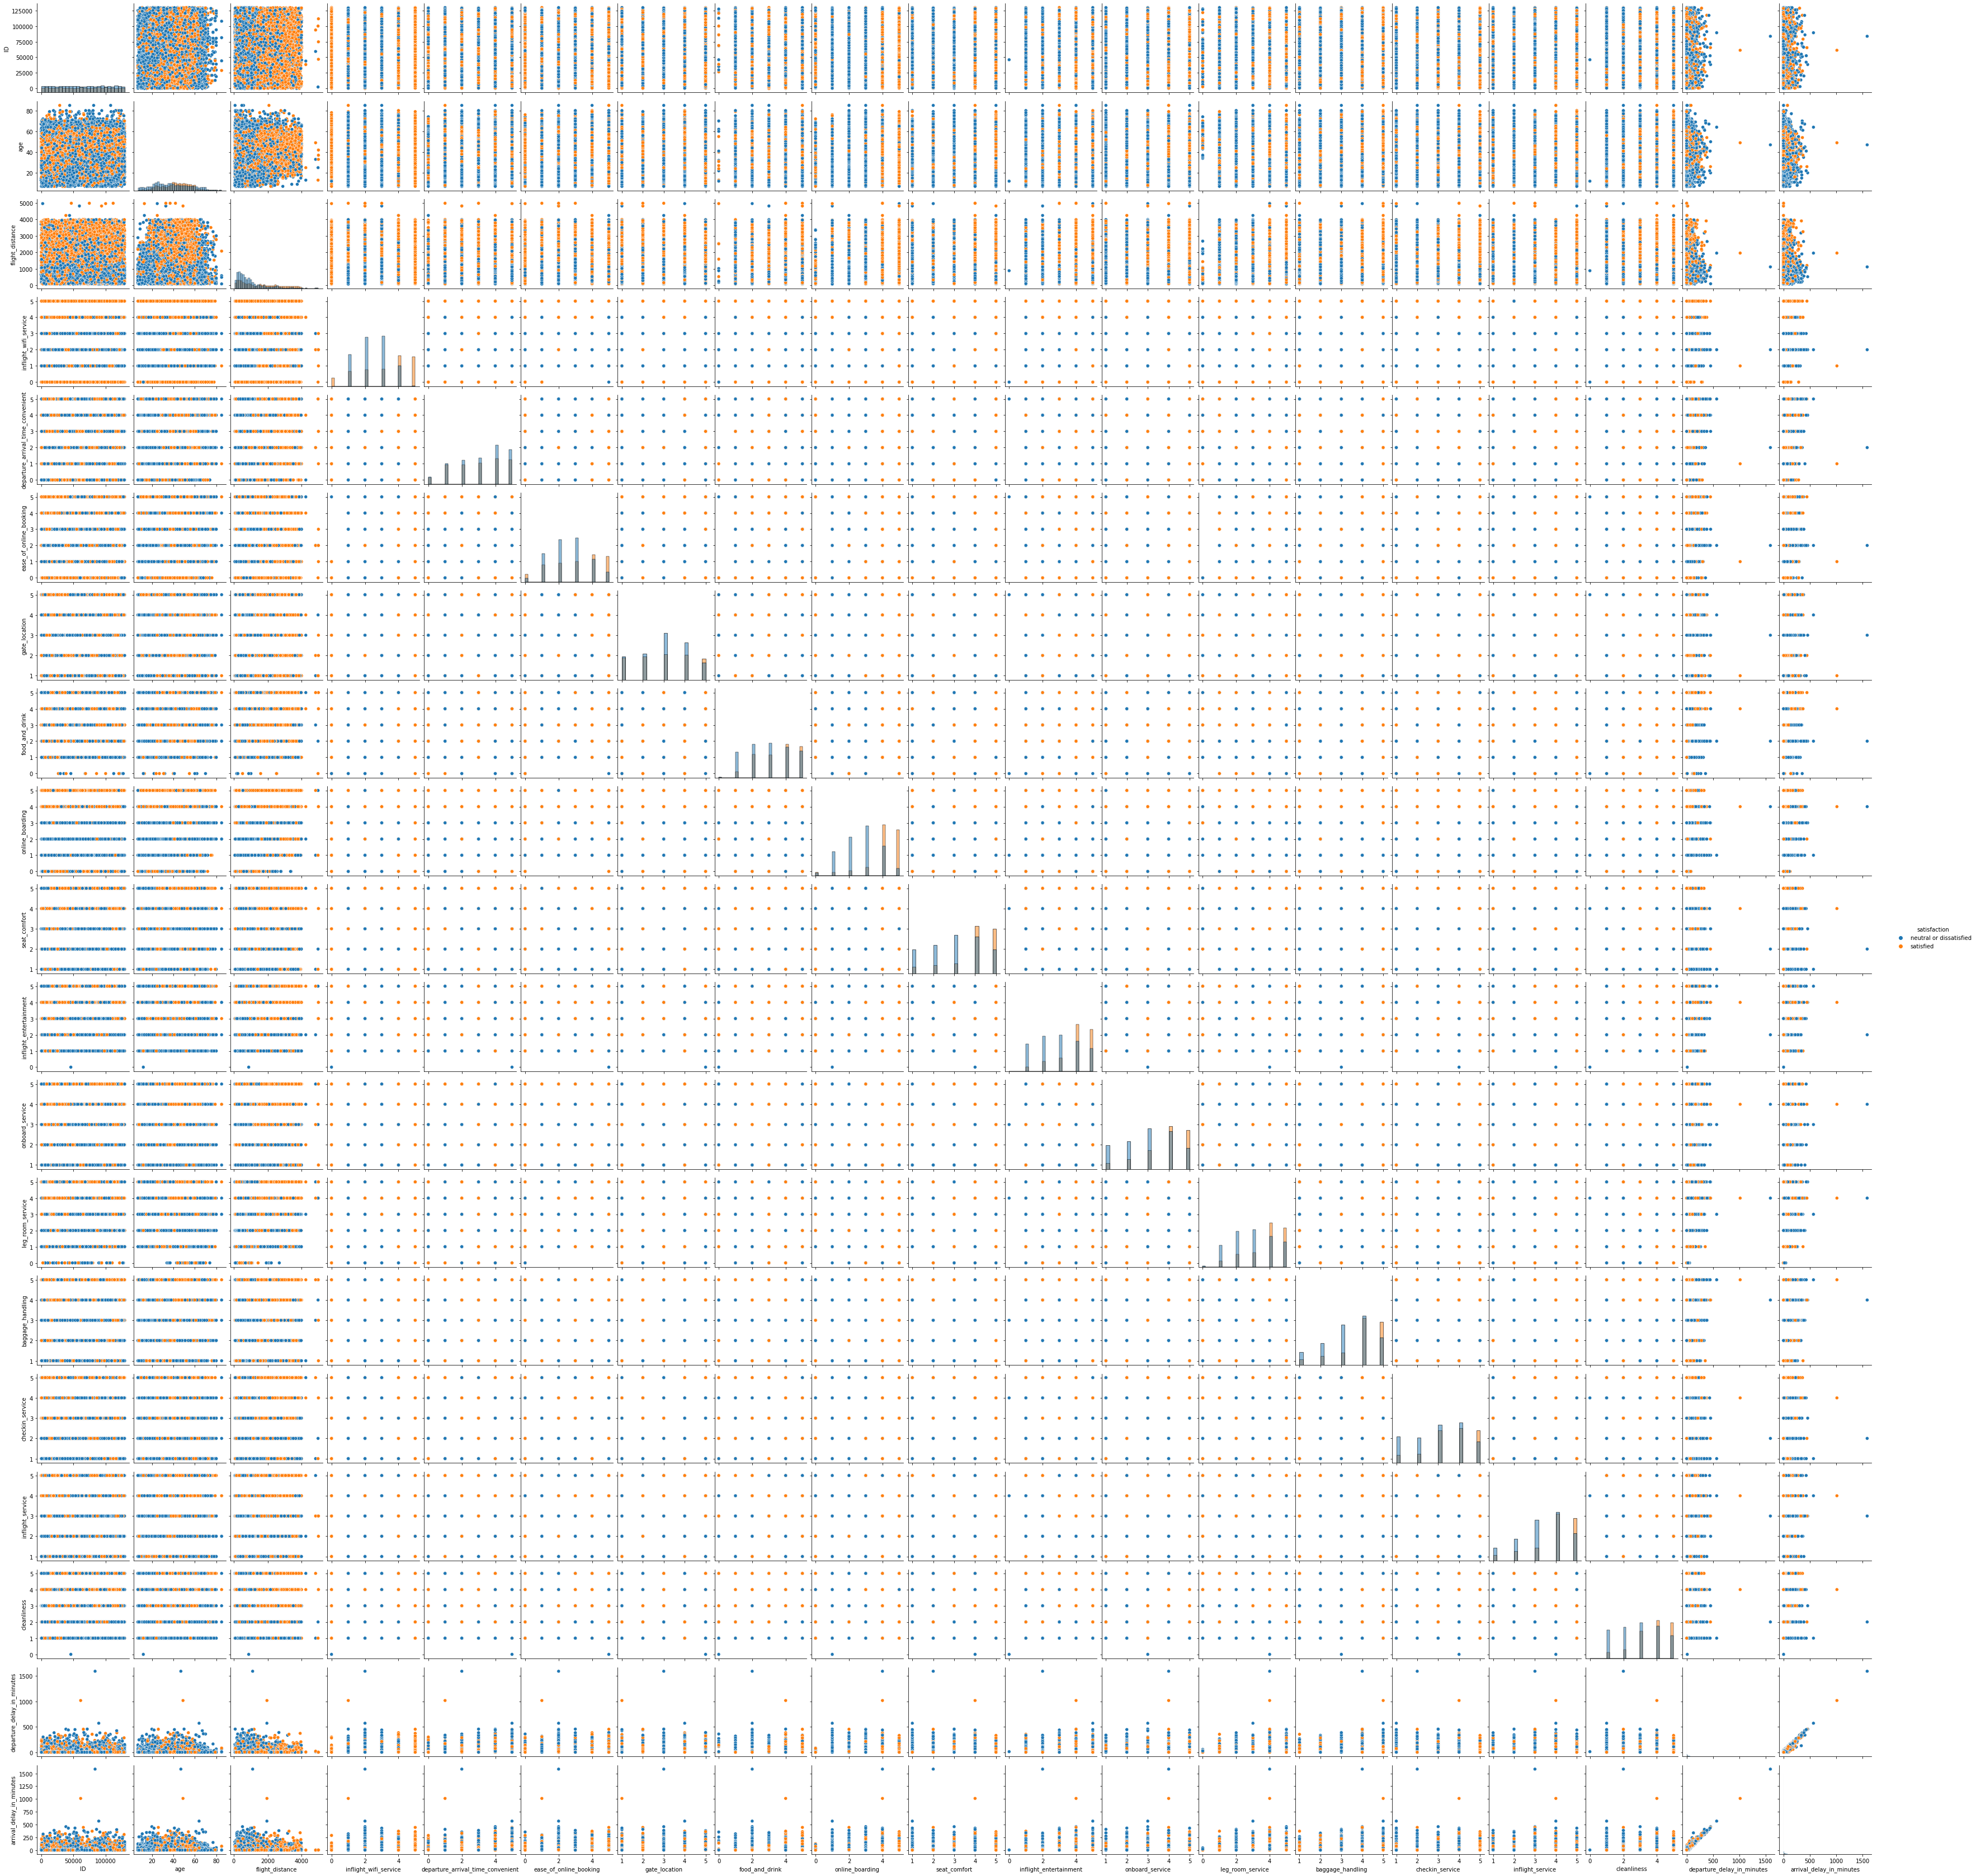

In [43]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=int(0.1 * data_raw.shape[0]), replace=False)
sns.pairplot(data_raw.iloc[random_subset], hue='satisfaction', diag_kind='hist')

Заметим, что в некоторых диаграммах есть намеки на выбросы. К ним вернемся попозже. А пока рассмотрим главную диагональ. Для некоторых признаков гистограммы разных цветов не пересекаются, это говорит о том, что есть возможно какая-то зависимость между удовлетворенностью клиента и данным сервисом. Рассмотрим некоторые из них поподробнее

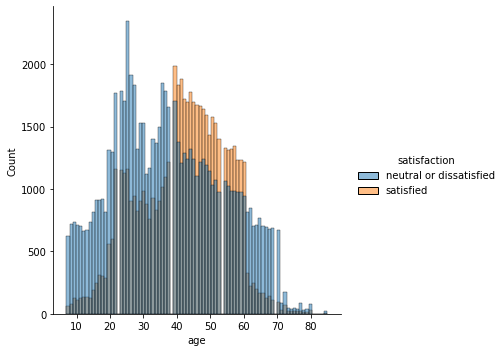

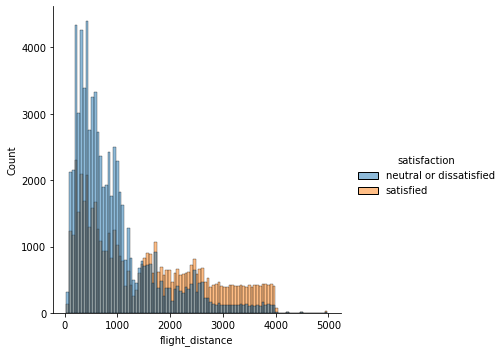

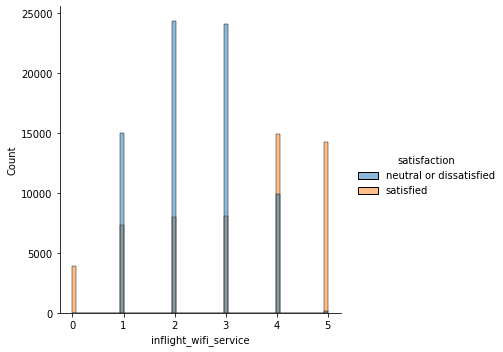

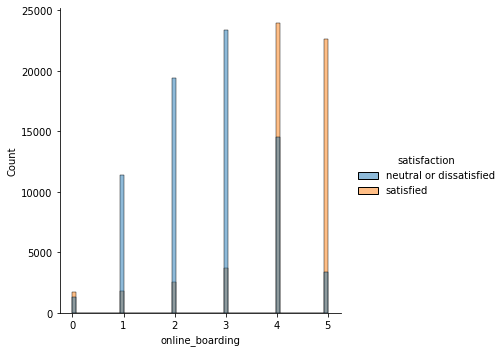

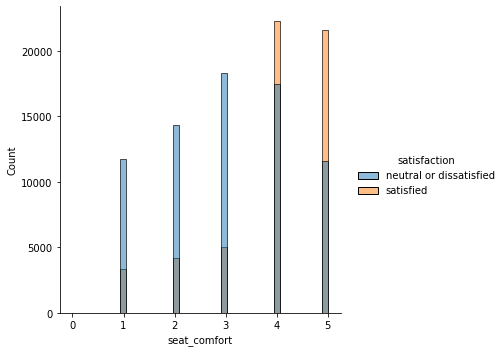

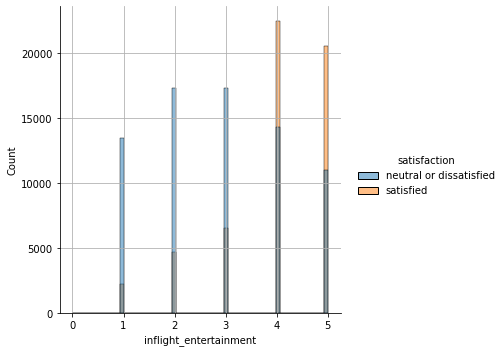

In [47]:
features = ['age', 'flight_distance', 'inflight_wifi_service', 'online_boarding', 'seat_comfort', 'inflight_entertainment']

for i, feature in enumerate(features):
    sns.displot(data=data_raw, x=feature, kind='hist', hue='satisfaction')
    
plt.grid()

Для признаков **'inflight_wifi_service', 'online_boarding', 'seat_comfort', 'inflight_entertainment'**, результаты выглядят вполне логичными. Чем выше оценка за данный сервис, тем вероятнее клиент будет удовлетворен (это видно по гистограммам, что ближе к правому концу голубые столбцы уменьшаются, а оранжевые увеличиваются). Также интересный результат получен у признака **"flight_distance"** - при коротких дистанциях клиенты были чаще либо нейтральны, либо разочарованы, а при более длинных (от 1150 миль) клиенты чаще были удовлетворены предоставленным сервисом.